# ***Business Undestanding***

- We have to predict the energy in terms of Temprature, Vaccum, Humidity and Presure.
- Predict the energy using the ANN model with high accuracy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_excel("energy.xlsx")
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


# ***Data Understanding***

In [3]:
df.rename(columns = {"AT" : "Temprature", "V": "Vaccum", "AP": "Pressure", "RH": "Humidity", "PE": "Energy"}, inplace = True)

In [4]:
df.shape

(9568, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Temprature  9568 non-null   float64
 1   Vaccum      9568 non-null   float64
 2   Pressure    9568 non-null   float64
 3   Humidity    9568 non-null   float64
 4   Energy      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [6]:
df.isna().sum()

Temprature    0
Vaccum        0
Pressure      0
Humidity      0
Energy        0
dtype: int64

In [7]:
df.duplicated().sum()

41

In [8]:
df.describe()

,Temprature,Vaccum,Pressure,Humidity,Energy
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


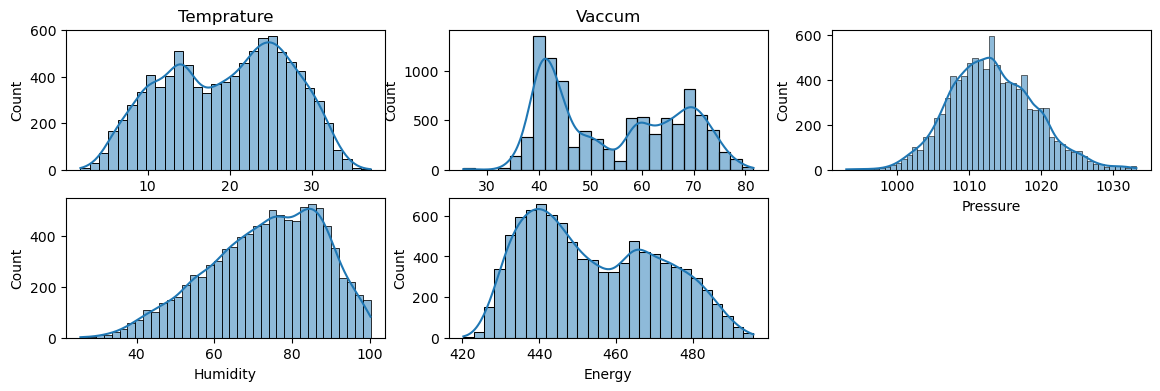

In [9]:
plt.figure(figsize = (14, 4))

plt.subplot(2, 3, 1)
plt.title("Temprature")
sns.histplot(df["Temprature"], kde = True)

plt.subplot(2, 3, 2)
plt.title("Vaccum")
sns.histplot(df["Vaccum"], kde = True)

plt.subplot(2, 3, 3)
sns.histplot(df["Pressure"], kde = True)

plt.subplot(2, 3, 4)
sns.histplot(df["Humidity"], kde = True)

plt.subplot(2, 3, 5)
sns.histplot(df["Energy"], kde = True)

plt.show()

# ***Data Preprocessing***

***Data Cleaning***

In [10]:
df.drop_duplicates(inplace = True)

***Feature Scaling***

In [10]:
df.skew()

AT   -0.136107
V     0.196819
AP    0.273846
RH   -0.435138
PE    0.305791
dtype: float64

***Train-Test-Split***

In [11]:
X = df.drop("Energy", axis = 1)
y = df["Energy"]

In [12]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.neural_network import MLPClassifier

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

# ***Modelling - Perceptron***

In [14]:
def ann_perceptron_model():
    model = Sequential()
    model.add(Dense(input_dim = 4, units = 6, activation = "relu", kernel_initializer = "uniform"))
    model.add(Dense(units = 1, activation = "relu", kernel_initializer = "uniform"))
    model.compile(optimizer = "adam", loss = "mean_squared_error")
    return model

In [15]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
model = ann_perceptron_model()
model.fit(X_train, y_train, epochs = 100, batch_size = 31)

Epoch 1/100
246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 206824.9219
Epoch 2/100
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 204861.5938
Epoch 3/100
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 200203.2344
Epoch 4/100
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 193759.2969
Epoch 5/100
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 185087.1719
Epoch 6/100
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 176196.1094
Epoch 7/100
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 165317.6875
Epoch 8/100
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 154504.5000
Epoch 9/100
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 142361.1719
Epoch 10/100
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 130963.2422
Epoch 11/100
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 119234.6875
Epoch 12/100
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 107900.8828
Epoch 13/100
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 96057.9141
Epoch 14/100
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms

In [18]:
pred_test = model.predict(X_test)
pred_train = model.predict(X_train)
print("Testing Accuracy :", r2_score(y_test, pred_test))
print("Training Accuracy :",r2_score(y_test, pred_test))

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Testing Accuracy : 0.9252863294613066
Training Accuracy : 0.9252863294613066


In [19]:
print("MSE for Train :", mean_squared_error(y_train, pred_train))
print("MSE for Test :", mean_squared_error(y_test, pred_test))

MSE for Train : 20.488421230142766
MSE for Test : 21.163733129225875


# ***Adding 1 Hidden Layer***

In [16]:
def model_hidden_layer():
    model = Sequential()
    model.add(Dense(input_dim = 4, units = 6, activation = "relu", kernel_initializer = "uniform"))
    model.add(Dense(units = 7, activation = "relu", kernel_initializer = "uniform"))
    model.add(Dense(units = 1, activation = "relu", kernel_initializer = "uniform"))
    model.compile(optimizer = "adam", loss = "mean_squared_error")
    return model

In [17]:
model1 = model_hidden_layer()
model1.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
239/239 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 206489.7188
Epoch 2/100
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 201131.7500
Epoch 3/100
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 177333.2188
Epoch 4/100
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 130977.7422
Epoch 5/100
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 77568.1094
Epoch 6/100
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 39301.0391
Epoch 7/100
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23124.4492
Epoch 8/100
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18312.2129
Epoch 9/100
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15139.6621
Epoch 10/100
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12493.5225
Epoch 11/100
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9674.3643
Epoch 12/100
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7397.0156
Epoch 13/100
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5121.0078
Epoch 14/100
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - los

In [18]:
pred_test = model1.predict(X_test)
pred_train = model1.predict(X_train)
print("Testing Accuracy with 1 hidden layer:", r2_score(y_test, pred_test))
print("Training Accuracy with 1 hidden layer:",r2_score(y_test, pred_test))
print("MSE for Train with 1 hidden layer:", mean_squared_error(y_train, pred_train))
print("MSE for Test with 1 hidden layer:", mean_squared_error(y_test, pred_test))

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Testing Accuracy with 1 hidden layer: 0.9252255829896812
Training Accuracy with 1 hidden layer: 0.9252255829896812
MSE for Train with 1 hidden layer: 20.59208434997546
MSE for Test with 1 hidden layer: 21.18094045025231


# ***Adding 2 Hidden Layer***

In [24]:
def model_hidden_2_layer():
    model = Sequential()
    model.add(Dense(input_dim = 4, units = 6, activation = "relu", kernel_initializer = "uniform"))
    model.add(Dense(units = 7, activation = "relu", kernel_initializer = "uniform"))
    model.add(Dense(units = 7, activation = "relu", kernel_initializer = "uniform"))
    model.add(Dense(units = 1, activation = "relu", kernel_initializer = "uniform"))
    model.compile(optimizer = "adam", loss = "mean_squared_error")
    return model

In [25]:
model2 = model_hidden_2_layer()
model2.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
239/239 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 207000.4531
Epoch 2/100
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 206930.0000
Epoch 3/100
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 206722.6250
Epoch 4/100
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 206909.6250
Epoch 5/100
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 206737.6562
Epoch 6/100
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 206882.4062
Epoch 7/100
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 206688.6875
Epoch 8/100
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 207017.5000
Epoch 9/100
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 206670.8125
Epoch 10/100
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 206920.9219
Epoch 11/100
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 206963.3594
Epoch 12/100
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 206965.8281
Epoch 13/100
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 206946.4375
Epoch 14/100
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

In [26]:
pred_test = model2.predict(X_test)
pred_train = model2.predict(X_train)
print("Testing Accuracy with 2 hidden layer:", r2_score(y_test, pred_test))
print("Training Accuracy with 2 hidden layer:",r2_score(y_test, pred_test))
print("MSE for Train with 2 hidden layer:", mean_squared_error(y_train, pred_train))
print("MSE for Test with 2 hidden layer:", mean_squared_error(y_test, pred_test))

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Testing Accuracy with 2 hidden layer: -726.6246363850771
Training Accuracy with 2 hidden layer: -726.6246363850771
MSE for Train with 2 hidden layer: 206861.76870926388
MSE for Test with 2 hidden layer: 206110.25414323193


***Adding more than 1 hidden layer affects the accuracy and produce more mean_squared_error. So, we will consider perceptron and ann with 1 hidden layer as a best model.***

# ***Predicting with New Data***

In [19]:
new_data = pd.DataFrame({
    "Temprature": 14.96 ,
    "Vaccum": 41.76,
    "Pressure": 1024.07,
    "Humidity": 73.17,
}, index = [0])

new_data = sc.transform(new_data)

pred = model1.predict(new_data)

print("Enery will be around :", round(pred[0][0],2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Enery will be around : 467.79


## ***Saving the model***

In [20]:
from joblib import dump
dump(model1, "ann_model_energy.joblib")

['ann_model_energy.joblib']